In [14]:
import pandas as pd
import re
import numpy as np

In [15]:
corpus="""
Simple example with cats and mouse
Another simple example with dog and cats
Another simple example with mouse and cheese
""".split("\n")[1:-1]

In [16]:
#clearing and tokenize 
L_A=corpus[0].lower().split()
L_B=corpus[1].lower().split()
L_C=corpus[2].lower().split()

In [17]:
word_set=set(L_A).union(set(L_B)).union(set(L_C))
word_dict_A=dict.fromkeys(word_set,0)
word_dict_B=dict.fromkeys(word_set,0)
word_dict_C=dict.fromkeys(word_set,0)

In [18]:
word_dict_A,word_dict_B,word_dict_C

({'mouse': 0,
  'with': 0,
  'and': 0,
  'cheese': 0,
  'dog': 0,
  'cats': 0,
  'simple': 0,
  'another': 0,
  'example': 0},
 {'mouse': 0,
  'with': 0,
  'and': 0,
  'cheese': 0,
  'dog': 0,
  'cats': 0,
  'simple': 0,
  'another': 0,
  'example': 0},
 {'mouse': 0,
  'with': 0,
  'and': 0,
  'cheese': 0,
  'dog': 0,
  'cats': 0,
  'simple': 0,
  'another': 0,
  'example': 0})

In [19]:
for word in L_A:
    word_dict_A[word]+=1
for word in L_B :
    word_dict_B[word]+=1
for word in L_C:
    word_dict_C[word]+=1

In [20]:
word_dict_A,word_dict_B,word_dict_C

({'mouse': 1,
  'with': 1,
  'and': 1,
  'cheese': 0,
  'dog': 0,
  'cats': 1,
  'simple': 1,
  'another': 0,
  'example': 1},
 {'mouse': 0,
  'with': 1,
  'and': 1,
  'cheese': 0,
  'dog': 1,
  'cats': 1,
  'simple': 1,
  'another': 1,
  'example': 1},
 {'mouse': 1,
  'with': 1,
  'and': 1,
  'cheese': 1,
  'dog': 0,
  'cats': 0,
  'simple': 1,
  'another': 1,
  'example': 1})

# TF_IDF

In [21]:
def compute_tf(word_dict,l):
    tf={}
    sum_nk=len(l)
    for word,count in word_dict.items():
        tf[word]=count/sum_nk
    return tf

In [22]:
tf_A=compute_tf(word_dict_A,L_A)
tf_B=compute_tf(word_dict_B,L_B)
tf_C=compute_tf(word_dict_C,L_C)

In [ ]:
def compute_idf(string_list):
    n=len(string_list)
    idf=dict.fromkeys(string_list[0].keys(),0)
    for l in string_list:
        for word ,count in l.items():
            if count >0:
                idf[word]+=1
    for word, v in idf.items():
        idf[word] = np.log(n / (v + 1))
    return idf

In [24]:
idf=compute_idf([word_dict_A,word_dict_B,word_dict_C])

In [25]:
def compute_tf_idf(tf,idf):
    tf_idf=dict.fromkeys(tf.keys(),0)
    for word ,v in tf.items():
        tf_idf[word]=v*idf[word]
    return tf_idf

In [26]:
tf_idf_A=compute_tf_idf(tf_A,idf)
tf_idf_A

{'mouse': 0.0,
 'with': -0.047947012075296815,
 'and': -0.047947012075296815,
 'cheese': 0.0,
 'dog': 0.0,
 'cats': 0.0,
 'simple': -0.047947012075296815,
 'another': 0.0,
 'example': -0.047947012075296815}

### Using Sklearn 


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [38]:
all_text=["So there is no way for me to plug it in here in the US unless I go by a converter.",
"Good case, Excellent value.",	
"Great for the jawbone.",
"Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!",
"The mic is great.",
"I have to jiggle the plug to get it to line up right to get decent volume",
"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one."
"If you are Razr owner...you must have this!",
"Needless to say, I wasted my money."]

In [39]:
def preprocessing(line):
    line = line.lower()  
    line = re.sub(r"[{}]", " ", line) 
    return line

In [40]:
tf_idf_vectorizer=TfidfVectorizer(preprocessor=preprocessing)
tf_idf = tf_idf_vectorizer.fit_transform(all_text)

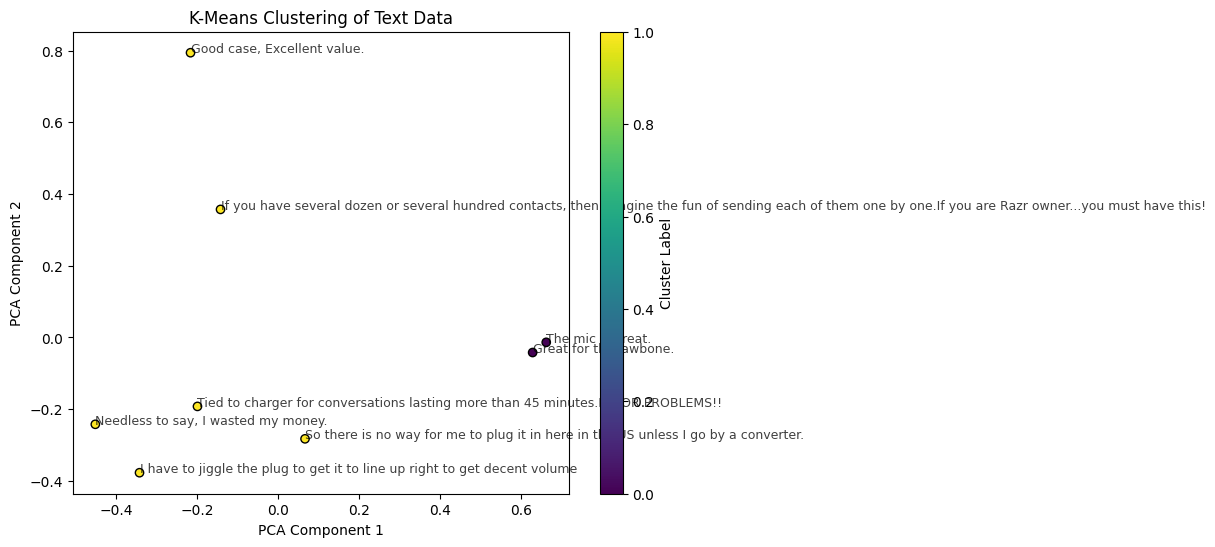

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(tf_idf)
labels = kmeans.labels_

pca = PCA(n_components=2)
tf_idf_2d = pca.fit_transform(tf_idf.toarray())

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tf_idf_2d[:, 0], tf_idf_2d[:, 1], c=labels, cmap="viridis", edgecolors="k")
plt.title("K-Means Clustering of Text Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

for i, txt in enumerate(all_text):
    plt.annotate(txt, (tf_idf_2d[i, 0], tf_idf_2d[i, 1]), fontsize=9, alpha=0.75)

plt.colorbar(scatter, label="Cluster Label")
plt.show()